# Development code snippets

---

## Imports

### Modules

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import winsound
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from deepplats import DeepPLF
from deepplats.models import ARF, DenseARF, PLR, PLF
from deepplats.models.utils import Scaler, TimeScaler
from deepplats.utils import get_data

### Data

In [4]:
df = get_data()

## Model tests

### Data

In [5]:
y = df.value.to_numpy()[-500:]
X = np.arange(y.size)

In [6]:
yscaler = Scaler()
y = yscaler.fit_transform(y)

### In-sample

In [309]:
forecast_trend = 'rnn'
forecast_resid = 'dense'
horizon = 1
lags = 20
plf_kwargs = {}
dar_kwargs = {}#{"size_hidden_layers": 32, "n_hidden_layers": 2, "dropout": 0.5}
deepplf = DeepPLF(
    lags=lags,
    horizon=horizon,
    forecast_trend=forecast_trend,
    forecast_resid=forecast_resid,
    plf_kwargs=plf_kwargs,
    dar_kwargs=dar_kwargs)

In [310]:
deepplf.fit(X, y,
            plr_epochs=5000, #plr_lam=.000, plr_lr=.001, plr_optim='Adam', plr_batch_size=1.,
            plf_epochs=500, #plf_lam=0.0, plf_lr=.0001, plf_batch_size=1.0,
            dar_epochs=1000)

AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:03<00:00, 325.17it/s]


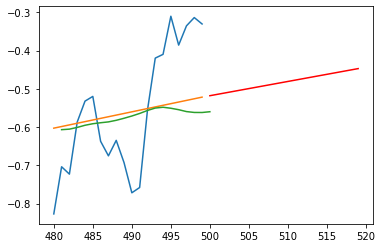

In [10]:
# Zoom on the simple extrapolation.
plt.plot(X[-20:], y[-20:])
plt.plot(X[-20:], deepplf.transform(X)[-20:])
plt.plot((X[lags-1:]+1)[-20:], deepplf.predict(X, y, model='trend')[-20:])
plt.plot((X+20)[-20:], deepplf.plf.extrapolate(torch.tensor([X]), horizon=20).detach().numpy().flatten(), c='red', )

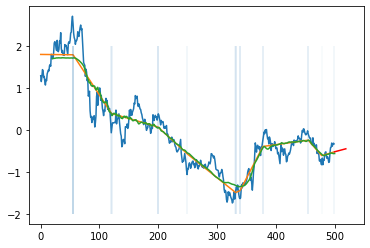

In [11]:
plt.plot(X, y)
plt.plot(X, deepplf.transform(X))
plt.plot(X[lags-1:]+1, deepplf.predict(X, y, model='trend'))
plt.plot((X+20)[-20:], deepplf.plf.extrapolate(torch.tensor([X]), horizon=20).detach().numpy().flatten(), c='red', )
plt.vlines(deepplf.plr.breakpoints(), -2, 2, linewidth=.1, alpha=.5)
plt.xlim(X.min()-20);

In [ ]:
# Either breaks=1.0 with lam=.001 OR breaks=.2 with lam=0

In [15]:
plt.style.use('default')
# plt.style.use('ggplot')

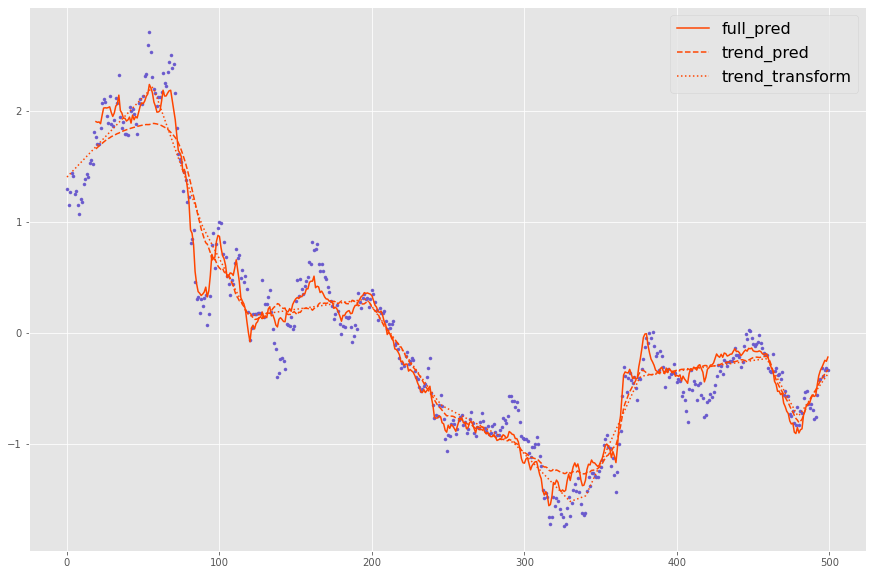

In [315]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(X, y, marker='.', c='slateblue')
transform = deepplf.transform(X)
trend = deepplf.predict(X, y, model='trend')
pred = deepplf.predict(X, y)
ax.plot(X[-pred.size:], pred, c='orangered', label='full_pred')
ax.plot(X[-pred.size:], trend, c='orangered', linestyle='--', label='trend_pred')
ax.plot(X, transform, c='orangered', linestyle=':', label='trend_transform')
plt.legend(prop={'size': 16})

extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig('../images/example_is.jpg',  bbox_inches=extent)

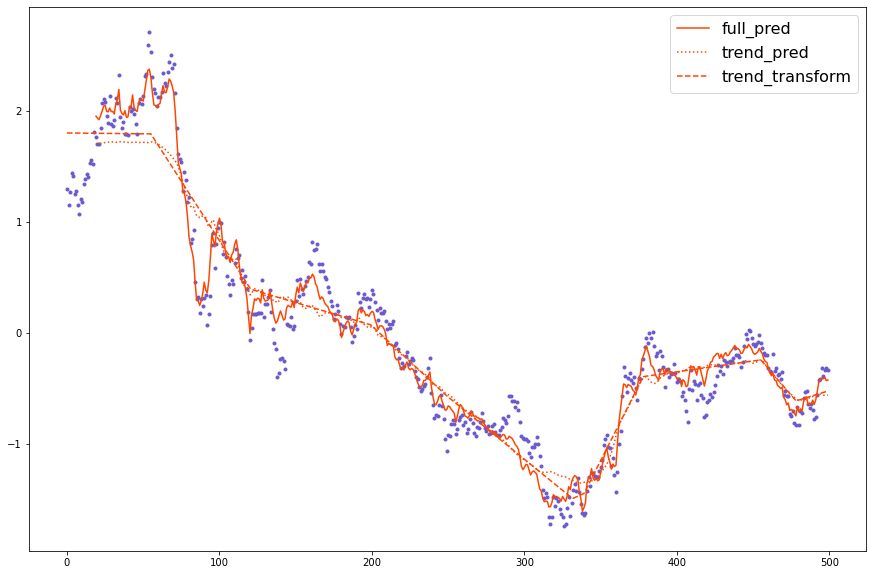

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(X, y, marker='.', c='slateblue')
transform = deepplf.transform(X)
trend = deepplf.predict(X, y, model='trend')
pred = deepplf.predict(X, y)
ax.plot(X[-pred.size:], pred, c='orangered', label='full_pred')
ax.plot(X[-pred.size:], trend, c='orangered', linestyle=':', label='trend_pred')
ax.plot(X, transform, c='orangered', linestyle='--', label='trend_transform')
plt.legend(prop={'size': 16})

# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# plt.savefig('../images/example.jpg',  bbox_inches=extent)

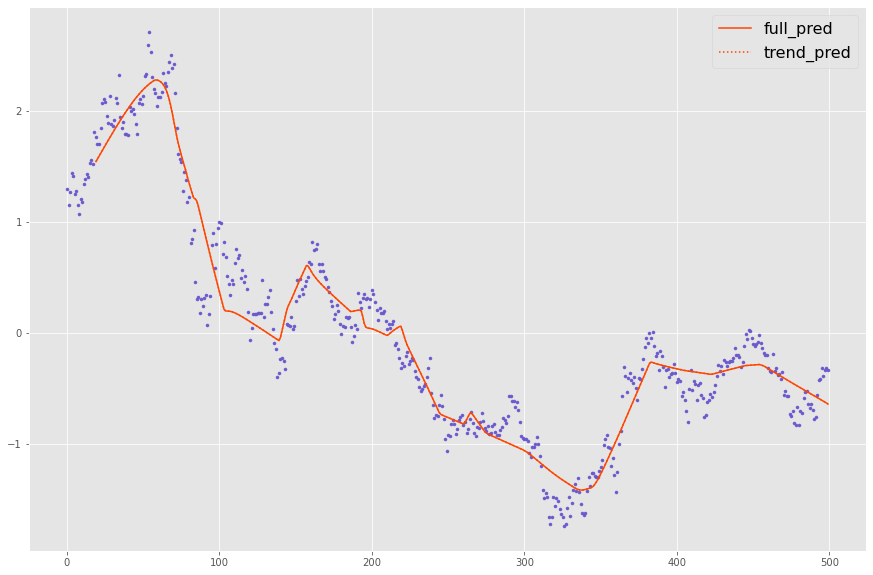

In [20]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(X, y, marker='.', c='slateblue')
trend = deepplf.predict(X, y, mod='trend')
pred = deepplf.predict(X, y)
ax.plot(X[-pred.size:], pred, c='orangered', label='full_pred')
ax.plot(X[-pred.size:], trend, c='orangered', linestyle=':', label='trend_pred')
plt.legend(prop={'size': 16})

# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# plt.savefig('../images/example.jpg',  bbox_inches=extent)

In [47]:
# plt.style.use('default')
plt.style.use('ggplot')

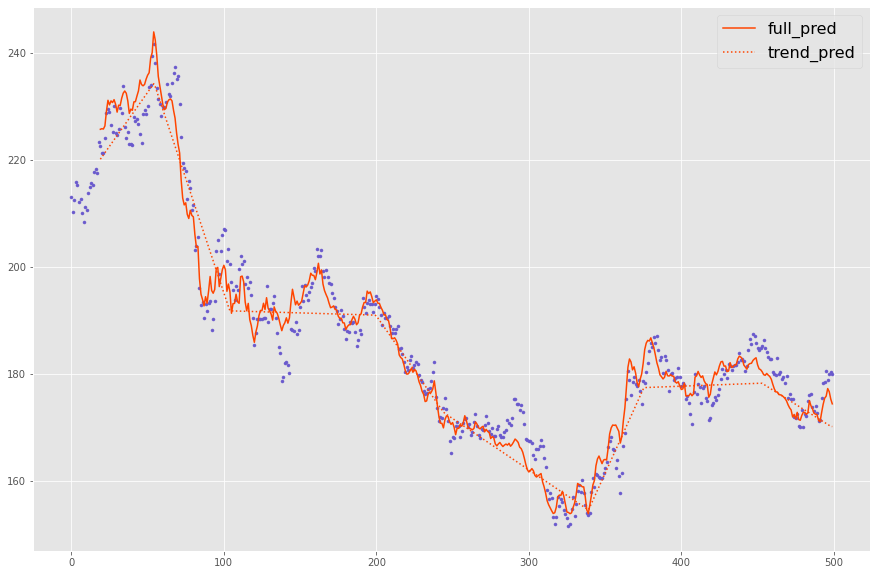

In [132]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(X, y, marker='.', c='slateblue')
trend = deepplf.predict(X, y, mod='trend')
pred = deepplf.predict(X, y)
ax.plot(X[-pred.size:], pred, c='orangered', label='full_pred')
ax.plot(X[-pred.size:], trend, c='orangered', linestyle=':', label='trend_pred')
plt.legend(prop={'size': 16})

# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# plt.savefig('../images/example.jpg',  bbox_inches=extent)

 ### Out-of-sample

In [13]:
# plt.style.use('default')
plt.style.use('ggplot')

In [ ]:
lags = 20
horizon = 1
breaks = 1.
forecast_trend = 'rnn'
forecast_resid = 'simple'
plf_kwargs = {}
dar_kwargs = {"size_hidden_layers": 32, "n_hidden_layers": 2, "dropout": 0.5}

train_size = 100
sections = 30
epochs=dict(
    plr_epochs=5000,
    plf_epochs=500,
    dar_epochs=1000,
)
preds = []

In [ ]:
for i in range(sections):
    deepplf = DeepPLF(
        lags=lags,
        horizon=horizon,
        breaks=breaks,
        forecast_trend=forecast_trend,
        forecast_resid=forecast_resid,
        plf_kwargs=plf_kwargs,
        dar_kwargs=dar_kwargs
    )
    index_diff = i * horizon
    X_train = X[index_diff : train_size + index_diff]
    y_train = y[index_diff : train_size + index_diff]
    deepplf.fit(X_train, y_train, **epochs)
    X_test = X[index_diff : train_size + index_diff]
    y_test = y[index_diff : train_size + index_diff]
    pred = deepplf.predict(X_test, y_test)
    pred = pred[-horizon:]
    preds.extend(pred.tolist()[-1:])
winsound.Beep(250, 1000)

In [283]:
preds = np.zeros(shape=(3, 30))
for i in range(30):
    print(i) # <<<<========================
    deepplf = DeepPLF(
        lags=10,
        horizon=1,
        breaks=1.0,
        forecast_trend='rnn',
        forecast_resid='dense',
        dar_kwargs = {"size_hidden_layers": 10, "n_hidden_layers": 1, "dropout": 0.5}
    )
    X_train = X[i : 100 + i]
    y_train = y[i : 100 + i]
    deepplf.fit(X_train, y_train, plr_epochs=5000, plf_epochs=500, dar_epochs=1000)
    preds[0][i] = deepplf.plf.extrapolate(torch.tensor(X_train)[None,]).detach().numpy()[0][0]
    preds[1][i] = deepplf.predict(X_train, y_train, model='trend')[-1]
    preds[2][i] = deepplf.predict(X_train, y_train, model='resid')[-1]
    
winsound.Beep(250, 1000) # <<<<========================

0


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 396.49it/s]


1


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 404.78it/s]


2


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 406.83it/s]


3


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 414.55it/s]


4


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 415.54it/s]


5


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 423.66it/s]


6


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 421.44it/s]


7


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 416.55it/s]


8


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 423.42it/s]


9


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 423.23it/s]


10


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 422.24it/s]


11


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 423.52it/s]


12


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 424.55it/s]


13


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 415.86it/s]


14


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 426.98it/s]


15


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 436.46it/s]


16


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 432.03it/s]


17


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 428.38it/s]


18


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 430.16it/s]


19


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 435.76it/s]


20


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 433.56it/s]


21


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 406.92it/s]


22


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 412.70it/s]


23


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 416.82it/s]


24


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 415.77it/s]


25


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 414.66it/s]


26


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 407.87it/s]


27


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 418.10it/s]


28


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 407.62it/s]


29


AutoregressiveForecasting: 100%|██████████| 1000/1000 [00:02<00:00, 421.33it/s]


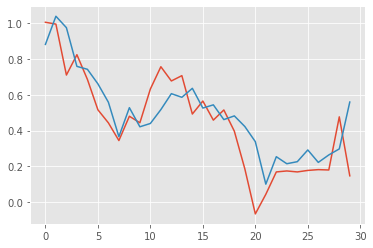

In [308]:
plt.plot(y[100:130])
plt.plot(preds[1:].sum(0))

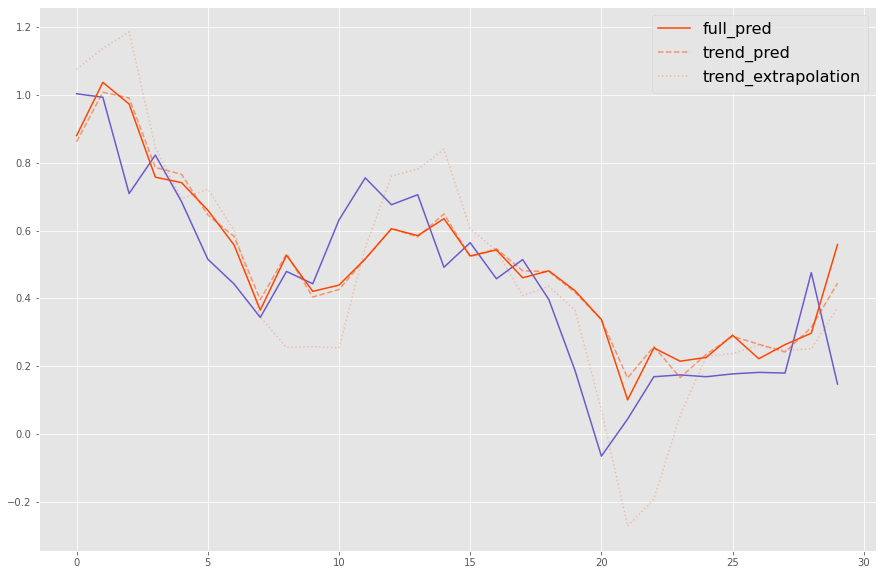

In [294]:
# rnn trend + shallow resid
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(X[:30 * horizon], y[train_size : train_size + 30 * horizon], c='slateblue')
ax.plot(preds[1:].sum(0), c='orangered', label='full_pred')
ax.plot(preds[1], c='orangered', linestyle='--', alpha=.5, label='trend_pred')
ax.plot(preds[0], c='orangered', linestyle=':', alpha=.25, label='trend_extrapolation')
plt.legend(prop={'size': 16})
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig('../images/example_oos.jpg',  bbox_inches=extent)

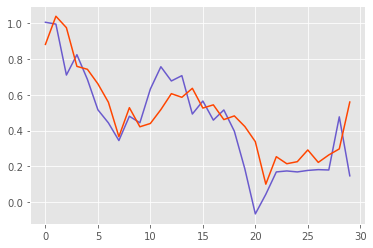

In [285]:
# rnn trend + deep resid
plt.plot(y[train_size : train_size + sections * horizon], c='slateblue')
plt.plot(preds[1:].sum(0)[:30], c='orangered')

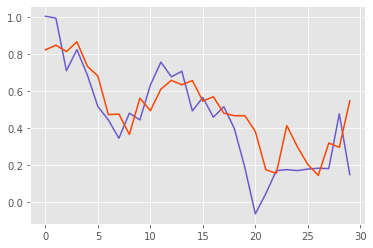

In [20]:
# rnn trend + deep resid
plt.plot(y[train_size : train_size + sections * horizon], c='slateblue')
plt.plot(preds, c='orangered')

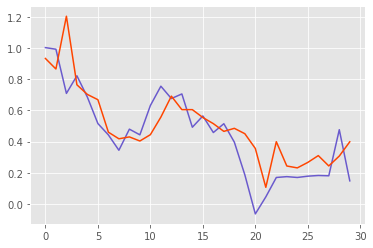

In [17]:
# rnn trend [ rnn(y_lag, trend_lag) = trend ]
plt.plot(y[train_size : train_size + sections * horizon], c='slateblue')
plt.plot(preds, c='orangered')

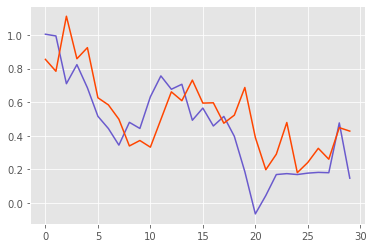

In [23]:
# rnn trend [ f(trend) = y ]
plt.plot(y[train_size : train_size + sections * horizon], c='slateblue')
plt.plot(preds, c='orangered')

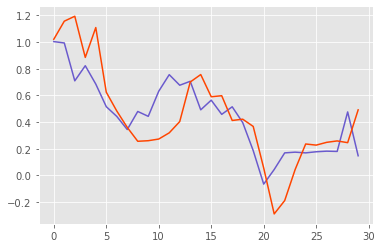

In [20]:
# simple (extrapolated) trend
plt.plot(y[train_size : train_size + sections * horizon], c='slateblue')
plt.plot(preds, c='orangered')

### Testing

In [10]:
from deepplats.models.utils import FlattenLSTM

In [11]:
from tqdm import tqdm

In [12]:
y = df.value.to_numpy()[-500:]
X = np.arange(y.size)

In [13]:
SEQ_LENGTH = 50
scaler = Scaler()
scaler.fit(y)
y_trans = scaler.transform(y)
y_roll = DeepPLF._roll_arr(y_trans, SEQ_LENGTH)
target = y_trans[SEQ_LENGTH:]
y_roll = y_roll[:-1]
trend = deepplf.plr(torch.tensor(X, dtype=torch.float)[:, None, None]).detach().numpy().flatten()
trend_roll = DeepPLF._roll_arr(scaler.transform(trend), SEQ_LENGTH)
trend_roll = trend_roll[:-1]
X_roll = DeepPLF._roll_arr(X, SEQ_LENGTH)
X_roll = X_roll[:-1]
# X_roll.T, y_roll.T, trend_roll.T
X_torch = torch.tensor(np.stack([trend_roll.T]).T, dtype=torch.float)
y_torch = torch.tensor(target, dtype=torch.float)[:, None]

NameError: name 'deepplf' is not defined

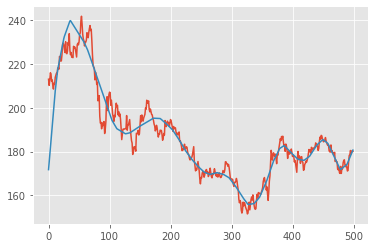

In [216]:
plt.plot(X, y)
plt.plot(trend)

In [221]:
epochs = 100
batch_size = 100
N_FEATURES = 1
HIDDEN_SIZE = 2
NUM_LAYERS = 1
LAST_STEP = False
LINEAR_INPUT_SIZE = HIDDEN_SIZE if LAST_STEP else HIDDEN_SIZE*SEQ_LENGTH
model = torch.nn.Sequential(*[
    torch.nn.LSTM(input_size=N_FEATURES, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS, batch_first=True),
    FlattenLSTM(last_step=LAST_STEP),
    torch.nn.Linear(LINEAR_INPUT_SIZE, 1)
])
optimizer = getattr(torch.optim, 'Adam')(model.parameters(), lr=.01)
lossfunc = getattr(torch.nn, 'MSELoss')()

In [228]:
# model.train()

batches = int(max(np.ceil(len(X) / batch_size), 1))
for epoch in tqdm(range(epochs)):
    for batch in range(batches):
        X_batch = X_torch[batch * batch_size : (batch + 1) * batch_size]
        y_batch = y_torch[batch * batch_size : (batch + 1) * batch_size]
        y_hat = model(X_batch) # model(X_torch)
        optimizer.zero_grad()
        loss = lossfunc(y_batch, y_hat) # lossfunc(y_torch, y_hat)
        loss.backward()
        optimizer.step()

100%|██████████| 100/100 [00:04<00:00, 21.29it/s]


In [194]:
# model.eval();

In [229]:
pred = model(X_torch).detach().numpy()

0.14338795998187676


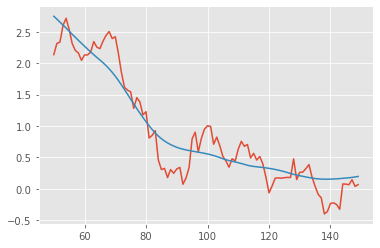

In [230]:
view_limit = 0, 100
view_floor = view_limit[0] + SEQ_LENGTH
view_ceil = view_limit[1] + SEQ_LENGTH
print(np.abs(scaler.transform(y)[SEQ_LENGTH:] - pred.flatten()).mean())
plt.plot(X[view_floor:view_ceil], scaler.transform(y)[view_floor:view_ceil])
plt.plot(X[view_floor:view_ceil], pred[view_floor-SEQ_LENGTH:view_ceil-SEQ_LENGTH])

0.08404526307038972


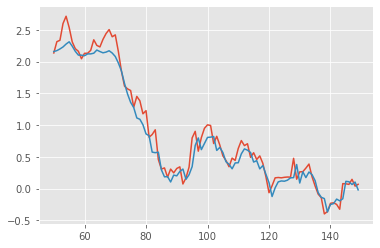

In [1247]:

view_limit = 0, 100
view_floor = view_limit[0] + SEQ_LENGTH
view_ceil = view_limit[1] + SEQ_LENGTH
print(np.abs(scaler.transform(y)[SEQ_LENGTH:] - pred.flatten()).mean())
plt.plot(X[view_floor:view_ceil], scaler.transform(y)[view_floor:view_ceil])
plt.plot(X[view_floor:view_ceil], pred[view_floor-SEQ_LENGTH:view_ceil-SEQ_LENGTH])

0.0722227968332655


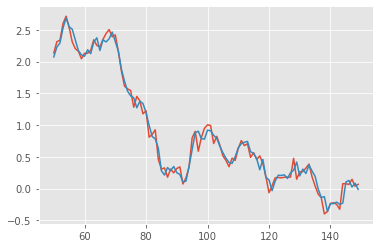

In [1197]:
# y only
view_limit = 0, 100
view_floor = view_limit[0] + SEQ_LENGTH
view_ceil = view_limit[1] + SEQ_LENGTH
print(np.abs(scaler.transform(y)[SEQ_LENGTH:] - pred.flatten()).mean())
plt.plot(X[view_floor:view_ceil], scaler.transform(y)[view_floor:view_ceil])
plt.plot(X[view_floor:view_ceil], pred[view_floor-SEQ_LENGTH:view_ceil-SEQ_LENGTH])

0.3303598787201947


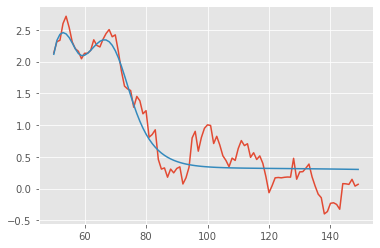

In [1191]:
# time only
view_limit = 0, 100
view_floor = view_limit[0] + SEQ_LENGTH
view_ceil = view_limit[1] + SEQ_LENGTH
print(np.abs(scaler.transform(y)[SEQ_LENGTH:] - pred.flatten()).mean())
plt.plot(X[view_floor:view_ceil], scaler.transform(y)[view_floor:view_ceil])
plt.plot(X[view_floor:view_ceil], pred[view_floor-SEQ_LENGTH:view_ceil-SEQ_LENGTH])

0.13969284794409664


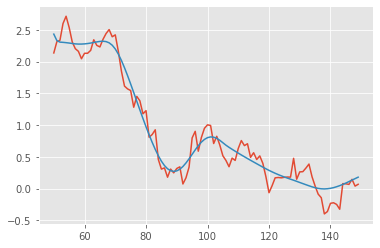

In [1186]:
# trend only
view_limit = 0, 100
view_floor = view_limit[0] + SEQ_LENGTH
view_ceil = view_limit[1] + SEQ_LENGTH
print(np.abs(scaler.transform(y)[SEQ_LENGTH:] - pred.flatten()).mean())
plt.plot(X[view_floor:view_ceil], scaler.transform(y)[view_floor:view_ceil])
plt.plot(X[view_floor:view_ceil], pred[view_floor-SEQ_LENGTH:view_ceil-SEQ_LENGTH])